In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
type(0)==int
type([])==list


True

[0.01520935] [-0.01007563]


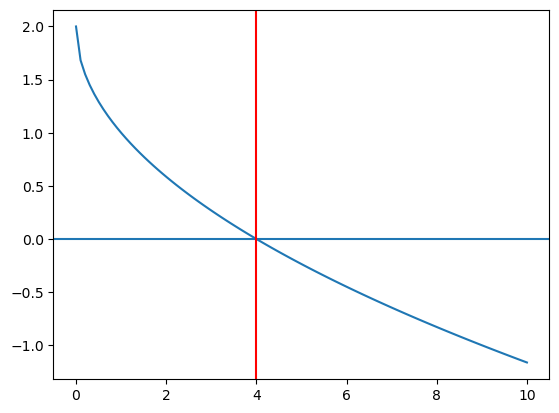

In [3]:
xgrid = np.linspace(0, 10, 100)  # X-coordinates
zgrid = - np.sqrt(xgrid) + 2  # Z-coordinates

# Find the indices where the line crosses zero

# zero_crossings = np.where(np.diff(np.sign(zgrid)))[0]

fig, ax = plt.subplots()

ax.plot(xgrid, zgrid)

# ax.scatter(zero_crossings[0], zero_crossings[1], color='r')

ax.axhline(0)

idx = np.where(np.diff(np.sign(zgrid)))[0]

print(zgrid[idx], zgrid[idx+1])

x1, x2 = xgrid[idx], xgrid[idx+1]
z1, z2 = zgrid[idx], zgrid[idx+1]

x_intersection = x1 + (0 - z1)/(z2 - z1) * (x2 - x1)

ax.axvline(x_intersection, color='r')



In [4]:
xgr = np.loadtxt('x.grd')
zgr = np.loadtxt('bed.dep')

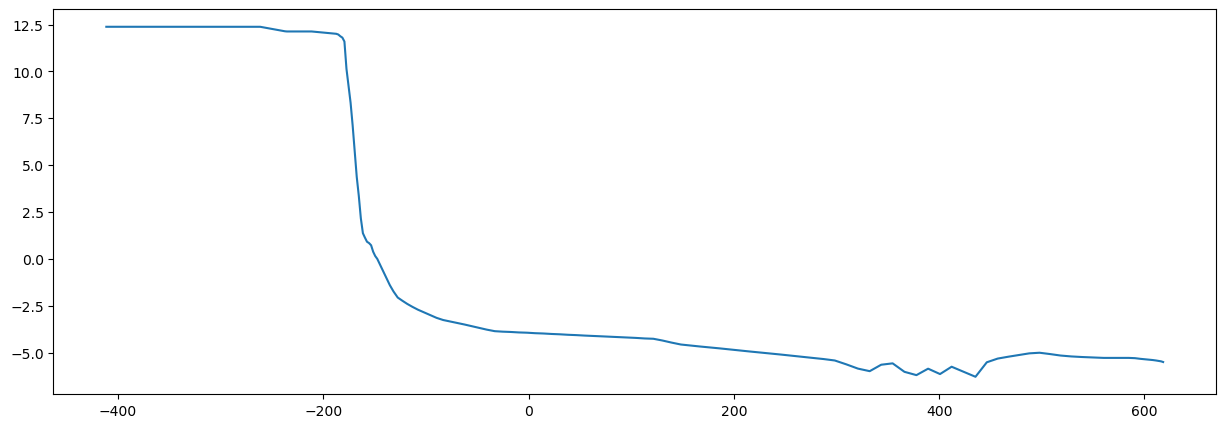

In [5]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(xgr, zgr)

# ax.set_aspect('equal')

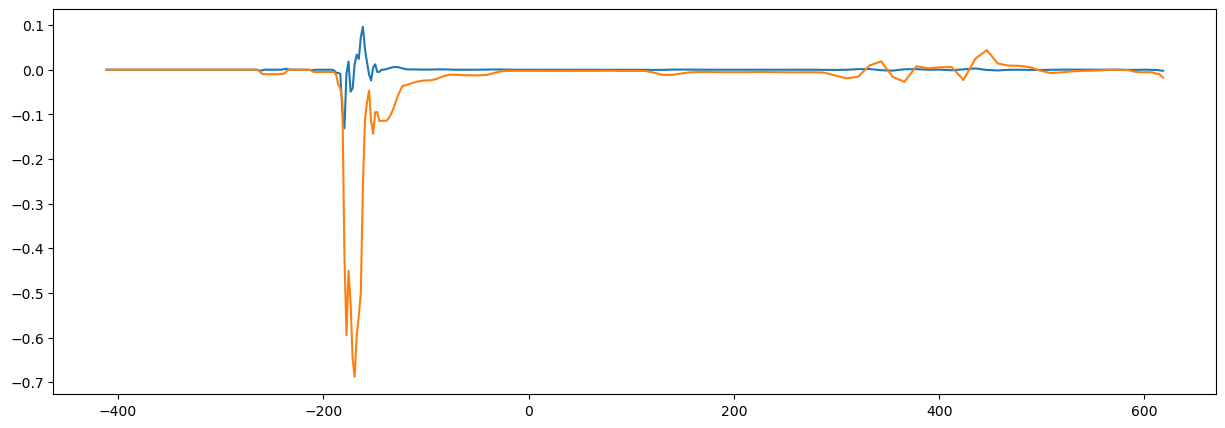

In [6]:
angles = np.gradient(zgr, xgr)
double_angles = np.gradient(angles, xgr)

fig, ax = plt.subplots(figsize=(15,5))

ax.plot(xgr, double_angles)
ax.plot(xgr, angles)

In [7]:
mask = (xgr > -200) * (xgr < -100)

print(angles[mask])

[-0.005      -0.00525    -0.00525    -0.005      -0.00525    -0.00525
 -0.012      -0.03275    -0.0415     -0.07025    -0.417      -0.59525
 -0.45075    -0.52175    -0.6475     -0.688      -0.59425    -0.55225
 -0.4985     -0.25825    -0.11375    -0.07225    -0.047      -0.11525
 -0.1435     -0.095      -0.095      -0.11456625 -0.11461873 -0.11448381
 -0.11443466 -0.10512538 -0.08700357 -0.05894502 -0.03669308 -0.03341899
 -0.02967889 -0.02625884 -0.02413131]


These methods don't seem that consistent

In [8]:
p1 = np.array((xgr[0], zgr[0]))
p2 = np.array((xgr[-1], zgr[-1]))

distances = np.zeros(xgr.shape)

for i in range(len(xgr)):
    
    p3 = np.array((xgr[i], zgr[i]))
        
    distances[i] = np.cross(p2-p1, p3-p1) / np.linalg.norm(p2-p1)
    
    if zgr[i] < xgr[i] * (zgr[-1] - zgr[0]) / (xgr[-1] - xgr[0]) + zgr[0]:
        distances[i] *= -1
    
bluff_edge_id = np.argmax(distances)
shore_line_id = np.argmin(distances)

bluff_edge_point = np.array((xgr[bluff_edge_id], zgr[bluff_edge_id]))
shore_line_point = np.array((xgr[shore_line_id], zgr[shore_line_id]))

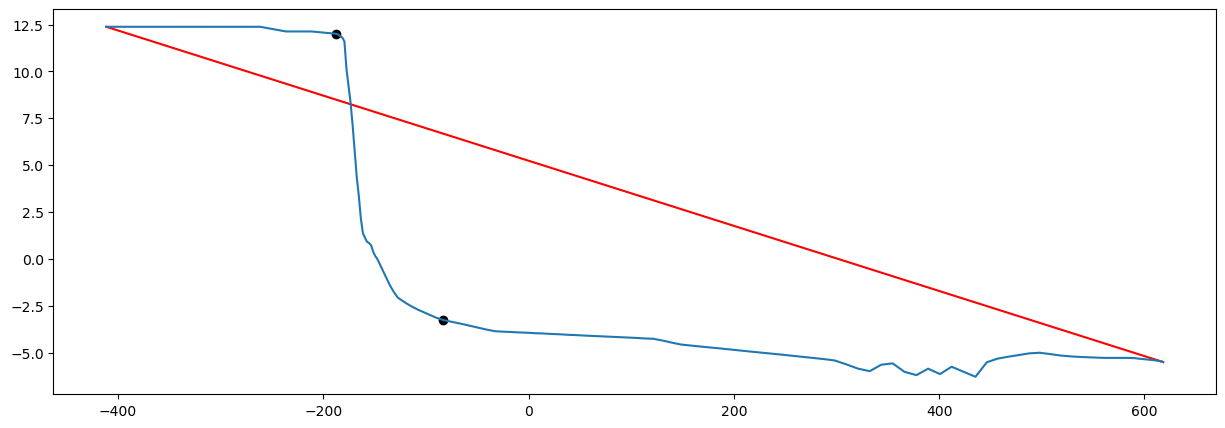

In [9]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot([p1[0], p2[0]], [p1[1], p2[1]], color='r')
ax.plot(xgr, zgr)

ax.scatter(bluff_edge_point[0], bluff_edge_point[1], color='k')
ax.scatter(shore_line_point[0], shore_line_point[1], color='k')

In [14]:
conditions = np.zeros(10, dtype=int)

mask = np.zeros(conditions.shape, dtype=int)

mask[[2, 4, 8]] = 1

print(mask)

conditions[mask] = 1

print(conditions)

[0 0 1 0 1 0 0 0 1 0]
[1 1 0 0 0 0 0 0 0 0]


In [10]:
-12 % 24

12

In [227]:
def convert(t):
    h = (((t - 12) % 24)/24) * 2 * np.pi
    if h > np.pi:
        h = -((2*np.pi)-h)
    return h

convert(1)

-2.879793265790644

In [20]:

# Example datetime64 object
dt = pd.to_datetime('2024-01-01')

# Extracting the day of the year
day_of_year = dt.dayofyear

print(day_of_year)

1


In [213]:
timestamps = pd.date_range('2023-01-01', '2023-01-05', freq='1h')
ids = np.arange(0, len(timestamps), 1)

x = np.linspace(0, 10, 2000)
y = -np.sqrt(x) + 10

angles = np.abs(np.gradient(y, x))

print(angles)

# I = 60 + 60 * -np.sin(ids/24 * 2 * np.pi)
I = np.ones(ids.shape)

[14.13859965  9.99749969  5.17508665 ...  0.15819304  0.15815345
  0.15813366]


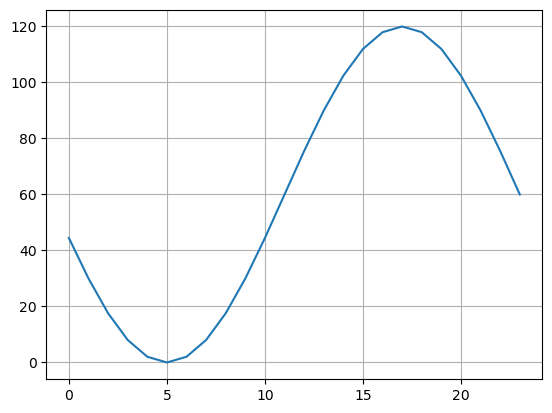

In [214]:
test_ids = np.arange(0, 24, 1)
test_I = 60 + 60 * -np.sin(test_ids/24 * 2 * np.pi + 1/12 * np.pi)

plt.plot(test_ids,test_I)

plt.grid()

In [215]:
def solar_flux_calculator(timestep_id, I0_p, angles, timezone_diff=-8, latitude=70, slope_orientation=88):
    """This function calculates the effective solar radiation flux on a sloped surface. The method from Buffo (1972) is used, assuming that the radiaton on the surface already includes the atmospheric transmission coefficient."""
    # get current timestamp
    current_timestamp = timestamps[timestep_id]
    
    # latitude
    phi = latitude / 360 * 2 * np.pi
    
    # declination, Sarbu (2017)
    delta = (23.45 * np.sin(
        (360/365 * (284 + current_timestamp.dayofyear)) / 360 * 2 * np.pi
        )) / 360 * 2 * np.pi
    
    # hour angle, for Alaska timezone difference w.r.t. UTC is -8h
    local_hour_of_day = current_timestamp.hour #+ timezone_diff
    # convert to hour angle
    h = (((local_hour_of_day - 12) % 24)/24) * 2 * np.pi
    
    # local angles
    alpha = 1/2 * np.pi - angles
    
    # slope aspect clockwise from the north
    beta = (90 - slope_orientation) / 360 * 2 * np.pi
    
    # calculate altitude angle off of the horizontal that the suns rays strike a horizontal surface
    A = np.arcsin(np.sin(phi) * np.sin(delta) + np.cos(phi) * np.cos(delta) * np.cos(h))
    
    # calculate azimuth
    AZ = np.arcsin(-np.cos(delta) * np.sin(h) / np.cos(A))
    
    # need to correct for when close to solstices
    if np.cos(h) <= np.tan(delta) / np.tan(phi):
        if local_hour_of_day <= 12:
            AZ = -np.pi + np.abs(AZ)
        else:
            AZ = np.pi - AZ
    
    
    # calculate Z
    Z = AZ + 1/2 * np.pi
    
    # calculate angle between the surface and the radiation
    theta = np.arcsin(np.sin(A) * np.cos(alpha) - np.cos(A) * np.sin(alpha) * np.sin(Z - beta))
    
    # calculate angle-corrected radiation
    I = I0_p * np.sin(theta)
            
    return I

In [216]:
I_list = []
I_list_flat = []

for I0, id in zip(I, ids):
    I_list.append(solar_flux_calculator(id, I0, angles))
    I_list_flat.append(solar_flux_calculator(id, I0, 0))
    
I_array = np.array(I_list)
I_array_flat = np.array(I_list_flat)

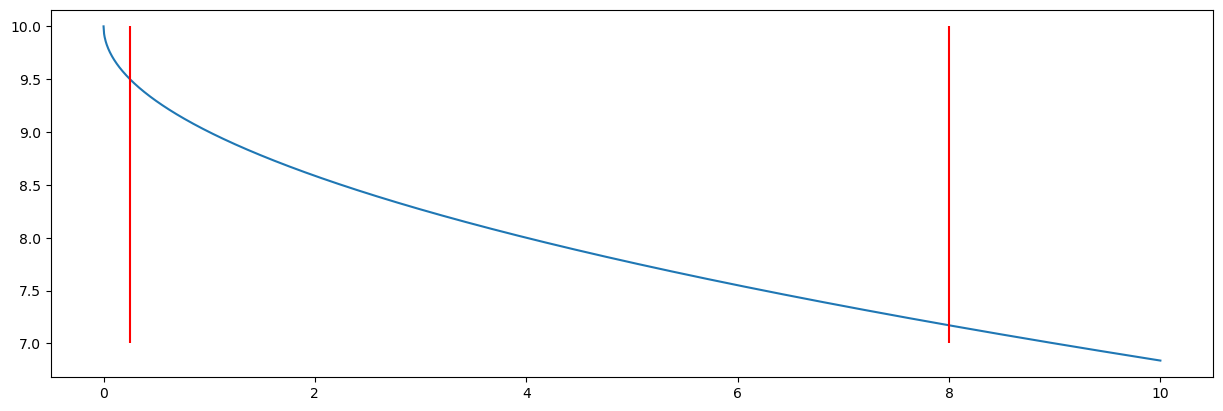

In [217]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(x, y)
ax.vlines([x[50], x[1600]], ymin=7, ymax=10, color='red')

ax.set_aspect('equal')

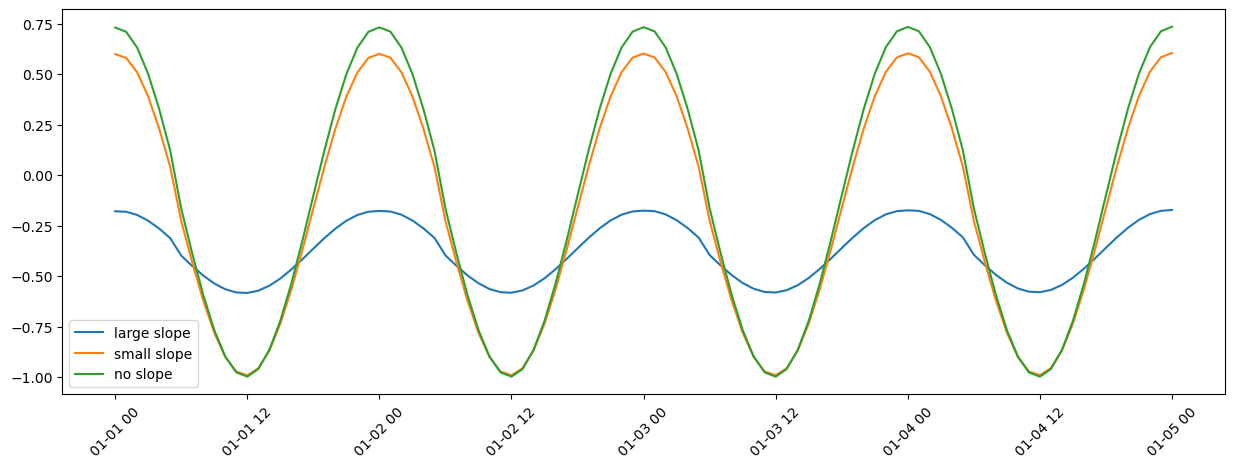

In [218]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(timestamps, I_array[:,50], label='large slope')
ax.plot(timestamps, I_array[:,1600], label='small slope')
ax.plot(timestamps, I_array_flat, label='no slope')

ax.legend()

plt.xticks(rotation=45);

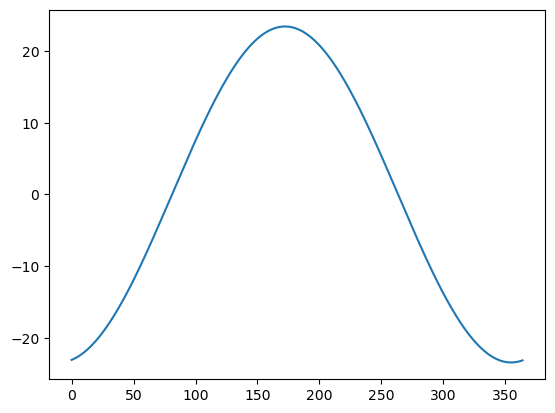

In [132]:
N = np.arange(0, 365, 1)
        
delta = 23.45 * np.sin(
        (360/365 * (284 + N)) / 360 * 2 * np.pi
        )

plt.plot(N, delta)

[3.14159265 3.20505917 3.26852569 3.33199221 3.39545873 3.45892524
 3.52239176 3.58585828 3.6493248  3.71279132 3.77625784 3.83972435
 3.90319087 3.96665739 4.03012391 4.09359043 4.15705695 4.22052346
 4.28398998 4.3474565  4.41092302 4.47438954 4.53785606 4.60132257
 4.66478909 4.72825561 4.79172213 4.85518865 4.91865516 4.98212168
 5.0455882  5.10905472 5.17252124 5.23598776 5.29945427 5.36292079
 5.42638731 5.48985383 5.55332035 5.61678687 5.68025338 5.7437199
 5.80718642 5.87065294 5.93411946 5.99758598 6.06105249 6.12451901
 6.18798553 6.25145205 0.03173326 0.09519978 0.1586663  0.22213281
 0.28559933 0.34906585 0.41253237 0.47599889 0.53946541 0.60293192
 0.66639844 0.72986496 0.79333148 0.856798   0.92026451 0.98373103
 1.04719755 1.11066407 1.17413059 1.23759711 1.30106362 1.36453014
 1.42799666 1.49146318 1.5549297  1.61839622 1.68186273 1.74532925
 1.80879577 1.87226229 1.93572881 1.99919533 2.06266184 2.12612836
 2.18959488 2.2530614  2.31652792 2.37999443 2.44346095 2.50692

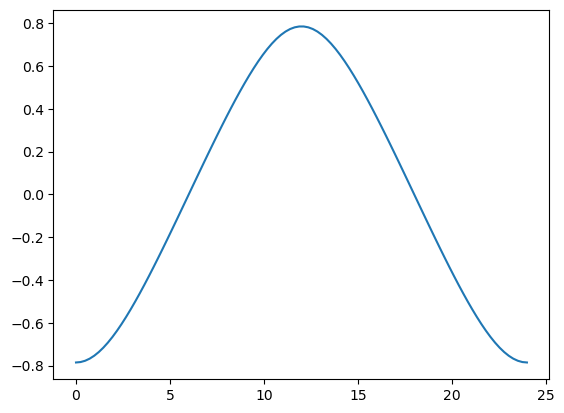

In [145]:
local_hour_of_day = np.linspace(0, 24, 100)
hour_angle = (((local_hour_of_day - 12) % 24)/24) * 2 * np.pi

print(hour_angle)

mask = (hour_angle > 3/2*np.pi) + (hour_angle < 1/2*np.pi)

delta = 0
phi=45 / 360 * 2 * np.pi

A = np.arcsin(np.sin(phi) * np.sin(delta) + np.cos(phi) * np.cos(delta) * np.cos(hour_angle))

# A *= mask

plt.plot(local_hour_of_day, A)

In [219]:
plt.close()